## Assignment 3 : ECE 8410 : Computer Vision

### Aniruddha Das 201715695

## Importing Libraries

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import time
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

## Loading MNIST Dataset

#### Helper Functions

##### Function to Display Images

In [2]:
def showimg(dataset, rows=7, cols=5):
    imgsize = int(np.sqrt(dataset.shape[1]))
    images = []
    
    
    for i in range(rows*cols):
        img = np.zeros(shape=[imgsize, imgsize])
        I = i+1
        ia = dataset[i:I]
        npi = 1
        for x in range(imgsize):
            for y in range(imgsize):               
                img[x][y] = ia[f'pixel{npi}'][i]
                npi = npi+1
        images.append(img)
                
 
        
    fig, axes = plt.subplots(rows, cols, figsize=(1.5*cols,2*rows))
    for i in range(rows*cols):
        ax = axes[i//cols, i%cols]
        ax.imshow(images[i], cmap='gray', vmin=0, vmax=1)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

##### Function to One Hot Labels

In [3]:
def one_hot(x, no_labels, dtype=np.float32):
        return np.array(x[:, None] == np.arange(no_labels), dtype=np.float32)

#### Downloading MNIST Data (as a 784X1 array instead of 28X28 array)

In [4]:
mnist_data = fetch_openml("mnist_784")
x = mnist_data["data"]                         #ImageData
y = mnist_data["target"]                       #ImageLables

#### Normalize x

In [5]:
x /= 255.0

#### One-hot Encode Image Labels

In [6]:
n_l = 10                                       #0-9
n_ex = y.shape[0]                              #Number of Examples
y_OH = one_hot(y.astype('int32'), n_l)

<ipython-input-3-2a3661407cda>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return np.array(x[:, None] == np.arange(no_labels), dtype=np.float32)


#### Preparing Train-Test Dataset

In [7]:
train_size = 60000                                                                           #selecting train dataset size
test_size = x.shape[0] - train_size                                                          #calculating test dataset size

# Selecting train and test datasets for image arrays and image labels
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y_OH[:train_size], y_OH[train_size:]

In [8]:
x_train, y_train = shuffle(x_train, y_train)
x_train = x_train.reset_index(drop=True)

In [10]:
x_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
x_test, y_test = shuffle(x_test, y_test)
x_test = x_test.reset_index(drop=True)

Training data: (60000, 784) (60000, 10)
Test data: (10000, 784) (10000, 10)


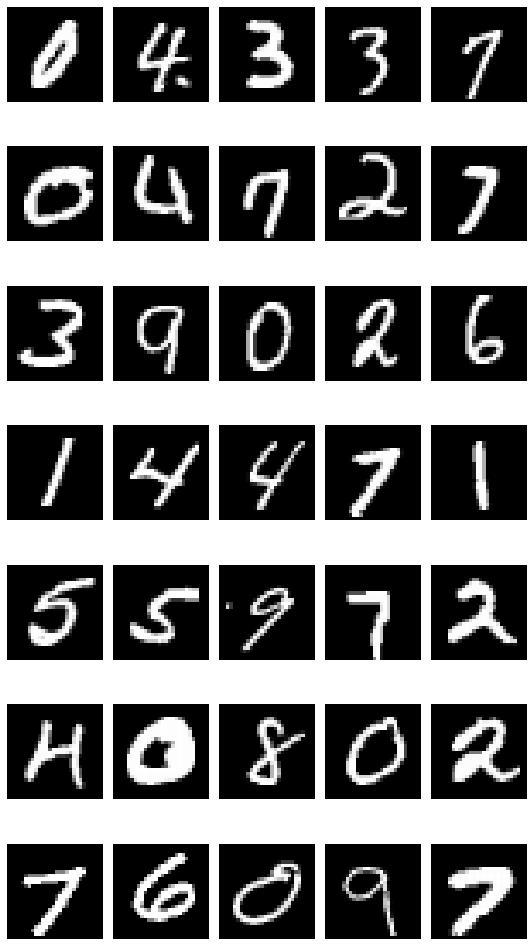

In [10]:
print("Training data: {} {}".format(x_train.shape, y_train.shape))
print("Test data: {} {}".format(x_test.shape, y_test.shape))
showimg(x_train)

## Designing the Neural Network

#### 3 Layer Neural Network

In [11]:
class DeepNeuralNetwork():
    # Network Activation by default sigmoid
    def __init__(self, sizes, activation='sigmoid'):
        self.sizes = sizes

        # Choose activation function
        if activation == 'relu':
            self.activation = self.relu
        elif activation == 'sigmoid':
            self.activation = self.sigmoid
        else:
            raise ValueError("Activation function is currently not support, please use 'relu' or 'sigmoid' instead.")

        # Save all weights (and biases) in params
        self.params = self.initialize()
        # Save all intermediate values, i.e. activations, in cache
        self.cache = {}
        
    # Derivative = False for Forward Propagation, True for Back Propagation
    def relu(self, x, derivative=False):
        if derivative:
            x = np.where(x < 0, 0, x)
            x = np.where(x >= 0, 1, x)
            return x
        return np.maximum(0, x)

    def sigmoid(self, x, derivative=False):
        if derivative:
            return (np.exp(-x))/((np.exp(-x)+1)**2)
        return 1/(1 + np.exp(-x))
    
    # Softmax Function which is Numerically Stable with Large Exponentials
    def softmax(self, x):
        exps = np.exp(x - x.max())
        return exps / np.sum(exps, axis=0)

    # Initializes and Returns Model Parameters
    def initialize(self):
        # number of nodes in each layer
        input_layer=self.sizes[0]
        hidden_layer=self.sizes[1]
        output_layer=self.sizes[2]
        
        params = {
            "W1": np.random.randn(hidden_layer, input_layer) * np.sqrt(1./input_layer),
            "b1": np.zeros((hidden_layer, 1)) * np.sqrt(1./input_layer),
            "W2": np.random.randn(output_layer, hidden_layer) * np.sqrt(1./hidden_layer),
            "b2": np.zeros((output_layer, 1)) * np.sqrt(1./hidden_layer)
        }
        return params
    
    # forward_propagate() function - stores the layer activation values in cache
    def forward_propagate(self, x):
        self.cache["X"] = x
        self.cache["Z1"] = np.matmul(self.params["W1"], self.cache["X"].T) + self.params["b1"]
        self.cache["A1"] = self.activation(self.cache["Z1"])
        self.cache["Z2"] = np.matmul(self.params["W2"], self.cache["A1"]) + self.params["b2"]
        self.cache["A2"] = self.softmax(self.cache["Z2"])
        return self.cache["A2"]
    
    # back_propagate() function used to calculate Gradients to Improve Network Parameters
    def back_propagate(self, y, output):
        
        current_batch_size = y.shape[0]
        
        dZ2 = output - y.T
        dW2 = (1./current_batch_size) * np.matmul(dZ2, self.cache["A1"].T)
        db2 = (1./current_batch_size) * np.sum(np.asarray(dZ2), axis=1, keepdims=True)

        dA1 = np.matmul(self.params["W2"].T, dZ2)
        dZ1 = dA1 * self.activation(self.cache["Z1"], derivative=True)
        dW1 = (1./current_batch_size) * np.matmul(dZ1, self.cache["X"])
        db1 = (1./current_batch_size) * np.sum(np.asarray(dZ1), axis=1, keepdims=True)

        self.grads = {"W1": dW1, "b1": db1, "W2": dW2, "b2": db2}
        return self.grads
    
    # Loss Function. We are using cross entropy loss 
    def cross_entropy_loss(self, y, output):
        l_sum = np.sum(np.multiply(y.T, np.log(output)))
        m = y.shape[0]
        l = -(1./m) * l_sum
        return l
    
    # Initializing Momentum Optimizer. To be Used when 'Momentum' selected as Network Optimizer 
    def initialize_momemtum_optimizer(self):
        momemtum_opt = {
            "W1": np.zeros(self.params["W1"].shape),
            "b1": np.zeros(self.params["b1"].shape),
            "W2": np.zeros(self.params["W2"].shape),
            "b2": np.zeros(self.params["b2"].shape),
        }
        return momemtum_opt
    
    # Network Optimizer Functions. 'SGD' and 'Momentum' Defined
    def optimize(self, l_rate=0.1, beta=.9):
        if self.optimizer == "sgd":
            for key in self.params:
                self.params[key] = self.params[key] - l_rate * self.grads[key]
        elif self.optimizer == "momentum":
            for key in self.params:
                self.momemtum_opt[key] = (beta * self.momemtum_opt[key] + (1. - beta) * self.grads[key])
                self.params[key] = self.params[key] - l_rate * self.momemtum_opt[key]
        else:
            raise ValueError("Optimizer is currently not support, please use 'sgd' or 'momentum' instead.")
            
    # Function to calculate Accuracy Score (Average of correct Hits)
    def accuracy(self, y, output):
        return np.sqrt(mean_squared_error(y, output.T))
    
    
    # Function to Train Network
    def train(self, x_train, y_train, x_test, y_test, epochs=10, batch_size=64, optimizer='momentum', l_rate=0.1, beta=.9):
        
        # Initializing Network HyperParameters
        self.epochs = epochs
        self.batch_size = batch_size
        num_batches = -(-x_train.shape[0] // self.batch_size)
        
        # Initialize optimizer
        self.optimizer = optimizer
        if self.optimizer == 'momentum':
            self.momemtum_opt = self.initialize_momemtum_optimizer()
        
        start_time = time.time()
        #template = "Epoch {}: {:.2f}s, train acc={:.2f}, train loss={:.2f}, test acc={:.2f}, test loss={:.2f}"
        
        # Train
        for i in range(self.epochs):

            for j in range(num_batches):
                # Selecting Batch for Training
                begin = j * self.batch_size
                end = min(begin + self.batch_size, x_train.shape[0]-1)
                x = x_train[begin:end]
                y = y_train[begin:end]
                
                # Forward Propagation to Obtain Network Layer Parameters
                output = self.forward_propagate(x)
                
                # Back Propagation to Obtain Layer Gradients
                grad = self.back_propagate(y, output)
                
                # Optimize Layer Parameters Using Obtained Gradients
                self.optimize(l_rate=l_rate, beta=beta)

            
            # Evaluate performance
            
            # Training data
            output = self.forward_propagate(x_train)
            train_acc = self.accuracy(y_train, output)
            train_loss = self.cross_entropy_loss(y_train, output)
            
            # Test data
            output = self.forward_propagate(x_test)
            test_acc = self.accuracy(y_test, output)
            test_loss = self.cross_entropy_loss(y_test, output)
            
            print(f"Epoch {i+1}: {time.time()-start_time:.4f}s, train acc = {train_acc:.6f}, test acc = {test_acc:.6f}")

In [12]:
dnn = DeepNeuralNetwork(sizes=[784, 64, 10], activation='sigmoid')
model1 = dnn.train(x_train, y_train, x_test, y_test, batch_size=128, optimizer='momentum', l_rate=4, beta=.9)

<ipython-input-11-9b8bc1f0a083>:67: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  dW2 = (1./current_batch_size) * np.matmul(dZ2, self.cache["A1"].T)
<ipython-input-11-9b8bc1f0a083>:72: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarr

Epoch 1: 5.7493s, train acc = 0.082584, test acc = 0.086860


<ipython-input-11-9b8bc1f0a083>:55: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  self.cache["Z1"] = np.matmul(self.params["W1"], self.cache["X"].T) + self.params["b1"]
<ipython-input-11-9b8bc1f0a083>:57: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 

Epoch 2: 10.6431s, train acc = 0.068627, test acc = 0.075477


<ipython-input-11-9b8bc1f0a083>:55: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  self.cache["Z1"] = np.matmul(self.params["W1"], self.cache["X"].T) + self.params["b1"]
<ipython-input-11-9b8bc1f0a083>:57: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 

Epoch 3: 15.3212s, train acc = 0.059978, test acc = 0.069593


<ipython-input-11-9b8bc1f0a083>:55: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  self.cache["Z1"] = np.matmul(self.params["W1"], self.cache["X"].T) + self.params["b1"]
<ipython-input-11-9b8bc1f0a083>:57: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 

Epoch 4: 19.8401s, train acc = 0.054307, test acc = 0.066376


<ipython-input-11-9b8bc1f0a083>:55: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  self.cache["Z1"] = np.matmul(self.params["W1"], self.cache["X"].T) + self.params["b1"]
<ipython-input-11-9b8bc1f0a083>:57: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 

Epoch 5: 24.3869s, train acc = 0.049918, test acc = 0.064803


<ipython-input-11-9b8bc1f0a083>:55: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  self.cache["Z1"] = np.matmul(self.params["W1"], self.cache["X"].T) + self.params["b1"]
<ipython-input-11-9b8bc1f0a083>:57: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 

Epoch 6: 29.1386s, train acc = 0.045893, test acc = 0.064067


<ipython-input-11-9b8bc1f0a083>:55: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  self.cache["Z1"] = np.matmul(self.params["W1"], self.cache["X"].T) + self.params["b1"]
<ipython-input-11-9b8bc1f0a083>:57: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 

Epoch 7: 34.1382s, train acc = 0.042813, test acc = 0.064118


<ipython-input-11-9b8bc1f0a083>:55: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  self.cache["Z1"] = np.matmul(self.params["W1"], self.cache["X"].T) + self.params["b1"]
<ipython-input-11-9b8bc1f0a083>:57: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 

Epoch 8: 38.6525s, train acc = 0.040702, test acc = 0.064786


<ipython-input-11-9b8bc1f0a083>:55: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  self.cache["Z1"] = np.matmul(self.params["W1"], self.cache["X"].T) + self.params["b1"]
<ipython-input-11-9b8bc1f0a083>:57: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 

Epoch 9: 43.3041s, train acc = 0.039298, test acc = 0.065346
Epoch 10: 48.0218s, train acc = 0.037417, test acc = 0.065301


<ipython-input-11-9b8bc1f0a083>:55: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  self.cache["Z1"] = np.matmul(self.params["W1"], self.cache["X"].T) + self.params["b1"]
<ipython-input-11-9b8bc1f0a083>:57: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 

#### NOTE: We are using Mean Squarred Error for Accuracy calculation. Best possible result wold be 0.0

## Demonstration of Predictions Using Neural Network

#### Selecting Text set to be Used for Prediction

In [13]:
XT = x_test[0:35]

#### Finding Predictred Values (By Forward Propagation)

In [14]:
P = dnn.forward_propagate(XT)

<ipython-input-11-9b8bc1f0a083>:55: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  self.cache["Z1"] = np.matmul(self.params["W1"], self.cache["X"].T) + self.params["b1"]
<ipython-input-11-9b8bc1f0a083>:57: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 

In [15]:
P.shape

(10, 35)

In [16]:
P_f = P.T

#### Displaying images in selected Test Set

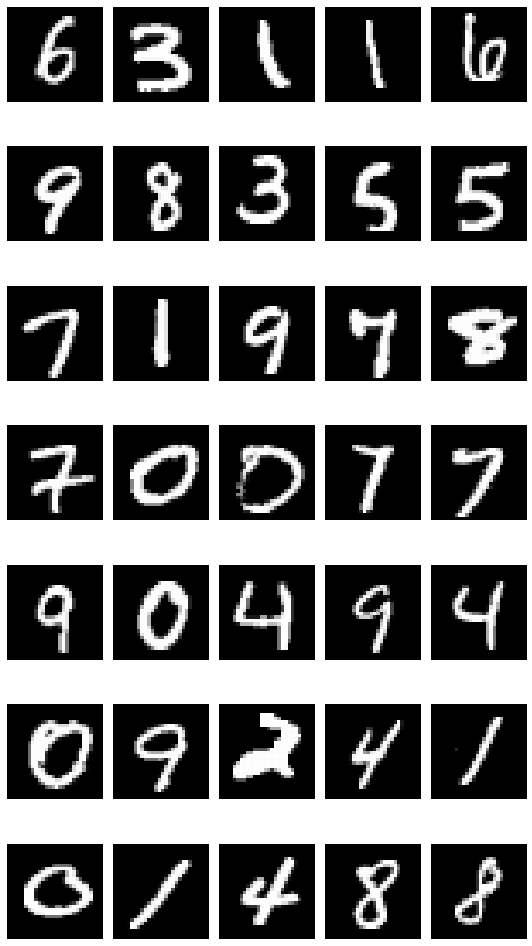

In [17]:
showimg(XT)

#### Function to Find Labels Fom Model Output

In [18]:
def showlabels(X):
    ns = len(X)
    label = -1
    M = 0.0
    preval = 0.0
    for i in range(ns):
        for j in range(X.shape[1]):
            if ((X[j][i] > M)):
                M = X[j][i]
                label = j
        print(f"Label for Image {i+1} is: {label}")
        label = -1
        M = 0

#### Printing Out Image Labels Predicted by NN

In [19]:
showlabels(P_f)

Label for Image 1 is: 6
Label for Image 2 is: 3
Label for Image 3 is: 1
Label for Image 4 is: 1
Label for Image 5 is: 6
Label for Image 6 is: 9
Label for Image 7 is: 8
Label for Image 8 is: 3
Label for Image 9 is: 5
Label for Image 10 is: 5
Label for Image 11 is: 7
Label for Image 12 is: 1
Label for Image 13 is: 9
Label for Image 14 is: 7
Label for Image 15 is: 8
Label for Image 16 is: 7
Label for Image 17 is: 0
Label for Image 18 is: 0
Label for Image 19 is: 7
Label for Image 20 is: 7
Label for Image 21 is: 9
Label for Image 22 is: 0
Label for Image 23 is: 4
Label for Image 24 is: 9
Label for Image 25 is: 4
Label for Image 26 is: 0
Label for Image 27 is: 9
Label for Image 28 is: 2
Label for Image 29 is: 4
Label for Image 30 is: 1
Label for Image 31 is: 0
Label for Image 32 is: 1
Label for Image 33 is: 4
Label for Image 34 is: 8
Label for Image 35 is: 8


#### REMARKS: Labels for test images predicted with very high accuracy!